In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
%matplotlib inline
plt.style.use("ggplot")

"""
Data Preprocessing

EXPERIMENT_DATA - Contain training data
EVALUATION_DATA - Contain testing data 
"""

EXPERIMENT_DATA = pickle.load(open('EXPERIMENT_SET_pandas.pkl', 'rb'))
EVALUATION_SET = pickle.load(open('EVALUATION_SET_pandas.pkl', 'rb'))

# Consider only graduated species
EXPERIMENT_DATA = EXPERIMENT_DATA[EXPERIMENT_DATA["GRAD"] == "YES"]

# For keeping output
detailed_output = {}

In [13]:
def plotRegression():
    plt.figure(figsize=(16,8))
    
    ###########################
    # 1st plot: linear scale
    ###########################
    bagSold = np.asarray(EXPERIMENT_DATA["BAGSOLD"]).reshape(-1, 1).astype(np.float)
    rm = np.asarray(EXPERIMENT_DATA["RM"]).reshape(-1,1).astype(np.float)
    
    # Liear Regression
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    
    # Find RMSE
    rmse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    
    plt.subplot("121")
    plt.title('Linear Regression RM vs. Bagsold')
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(rm, regr.predict(rm), color="green")
    plt.legend(["true_value", "Regression Line\nRMSE = {:e}".format(rmse)])
    
    detailed_output["RMSE of linear regression on entire dataset (linear scale)"] = rmse
    
    #######################
    # 2nd plot: log scale
    #######################
    bagSold = np.log(bagSold)
    
    # Linear Regression 
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    
    # Find RMSE
    rmse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    
    plt.subplot("122")
    plt.title('Linear Regression RM versus log of Bagsold')
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(rm, regr.predict(rm), color="green")
    plt.legend(["true_value", "Regression Line\nRMSE = {:e}".format(rmse)])
    
    detailed_output["RMSE of linear regression on entire dataset (log scale)"] = rmse
    
    plt.show()


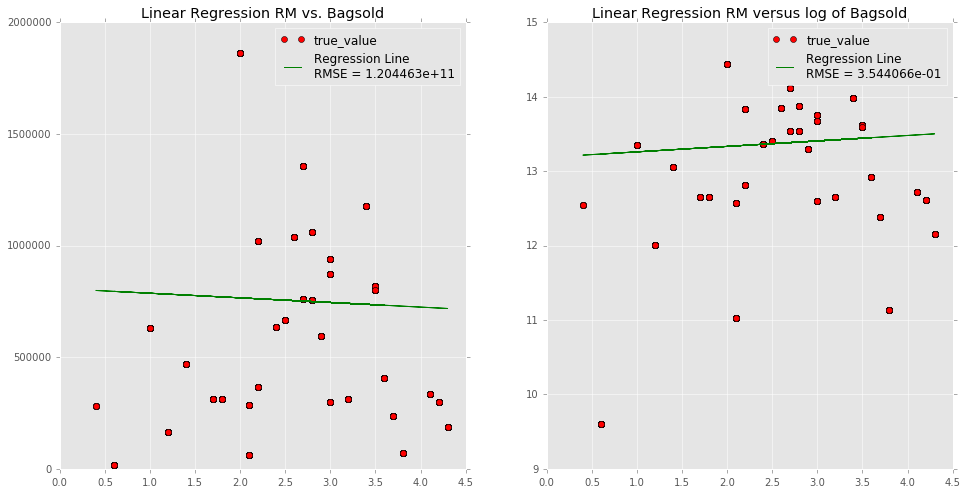

In [14]:
plotRegression()

0010 = 0.7999999999999999,41.02006987
0020 = 0.5,51.1125208
0030 = 0.5,32.824989825
0101 = 1.2,33.832471325
0103 = 1.2,55.8782157
0107 = 1.2,43.534346074999995
0110 = 0.9666666666666667,44.868794699999995
0119 = 1.2,43.772117825
0120 = 1.08,53.97745452
0130 = 0.9666666666666667,52.842995383333324
0140 = 1.2,46.978727625000005
0150 = 1.0,31.5415082
0160 = 0.5,47.7500359
0510 = 0.9666666666666667,57.99771501666666
0512 = 1.2,42.089150489999994
0513 = 1.4000000000000001,53.20812888333333
0517 = 1.2000000000000002,65.49310085
0520 = 1.35,66.3760272625
0550 = 1.1875,52.11954688749999
1102 = 1.2,46.9666457
1110 = 1.777049180327869,51.72896262459017
1120 = 1.3285714285714287,47.758214421428576
1130 = 1.0,65.48365836666666
1140 = 2.1166666666666667,62.34210493333334
1210 = 1.6285714285714286,52.84316886428571
1220 = 1.95,57.325961575
1230 = 2.0555555555555554,54.148868755555554
1240 = 2.0902777777777777,53.11554645277778
1241 = 2.1,51.57825005
1250 = 2.008163265306122,50.58025422448979
1260 = 

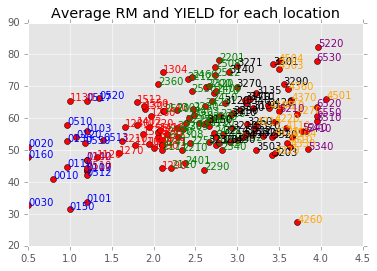

In [4]:
location_map = list(set(EXPERIMENT_DATA["LOCATION"]))
location_map.sort()

list_location = []
list_avg_rm = []
list_avg_yield = []
for val in location_map:
    avg_rm = np.average(EXPERIMENT_DATA[EXPERIMENT_DATA["LOCATION"] == str(val)]["RM"])
    avg_yield = np.average(EXPERIMENT_DATA[EXPERIMENT_DATA["LOCATION"] == str(val)]["YIELD"])
    list_location.append(str(val))
    list_avg_rm.append(avg_rm)
    list_avg_yield.append(avg_yield)
    print("{} = {},{}".format(val,avg_rm,avg_yield))
    
plt.title("Average RM and YIELD for each location")
plt.plot(list_avg_rm, list_avg_yield, 'ro')

for i, txt in enumerate(list_location):
    if int(txt) <= 1000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="blue")
    elif int(txt) <= 2000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="red")
    elif int(txt) <= 3000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="green")
    elif int(txt) <= 4000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="black")
    elif int(txt) <= 5000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="orange")
    else:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="purple")
plt.show()


### Analysis

From the preliminary analysis, we find that the number of different locateion in the dataset is 140. The location in the dataset is encoded as a 4-digit number. We first expected that we can group the quality of the species based on the location parameters. We then plot the average of __RM__ and __YIELD__ for each location, which is shown below: 

## Linear Regression on each group of location

According to prior analaysis, it appears that we can possibly categorize species on location. The approach we decide to adopt is to use first digit of the location number as a categorizer. The histogram in the previous section indicates that there exists roughly about 7 groups. Notice that the leftmost and rightmost columns seem to be outliers.

The number of possible location is 140.
Location 0010 has  10 species
Location 0020 has   2 species
Location 0030 has   4 species
Location 0101 has   4 species
Location 0103 has   4 species
Location 0107 has   4 species
Location 0110 has   6 species
Location 0119 has   4 species
Location 0120 has   5 species
Location 0130 has   6 species
Location 0140 has   4 species
Location 0150 has   6 species
Location 0160 has   2 species
Location 0510 has   6 species
Location 0512 has  10 species
Location 0513 has   6 species
Location 0517 has   6 species
Location 0520 has   8 species
Location 0550 has  16 species
Location 1102 has   4 species
Location 1110 has  61 species
Location 1120 has  14 species
Location 1130 has   6 species
Location 1140 has  12 species
Location 1210 has  14 species
Location 1220 has   4 species
Location 1230 has  72 species
Location 1240 has  72 species
Location 1241 has   2 species
Location 1250 has  98 species
Location 1260 has  49 species
Location 1270 has  20 species


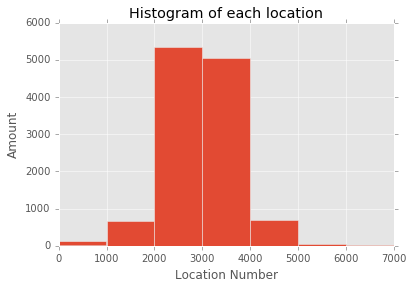

In [5]:
# Calculate the number of possible locations
location_set = set(EXPERIMENT_DATA["LOCATION"])
print("The number of possible location is {}.".format(len(location_set)))

location_histogram_list = []
for location in sorted(location_set):
    amount = len(EXPERIMENT_DATA[EXPERIMENT_DATA["LOCATION"] == str(location)])
    for j in range(amount):
        location_histogram_list.append(int(location))
    print("Location {} has {:>3} species".format(location, amount))
    
plt.title("Histogram of each location")
plt.xlabel("Location Number")
plt.ylabel("Amount")
plt.hist(location_histogram_list, bins=7, range=(0,7000))
plt.show()

In [6]:
# Convert location column to numeric
EXPERIMENT_DATA["LOCATION"] = EXPERIMENT_DATA["LOCATION"].apply(pd.to_numeric)

# Separate training dataset into 7 groups
dataByLocation = []
for i in range(7):
    dataByLocation.append(EXPERIMENT_DATA[(EXPERIMENT_DATA["LOCATION"] < ((i+1)*1000)) & (EXPERIMENT_DATA["LOCATION"] >= (i*1000))])

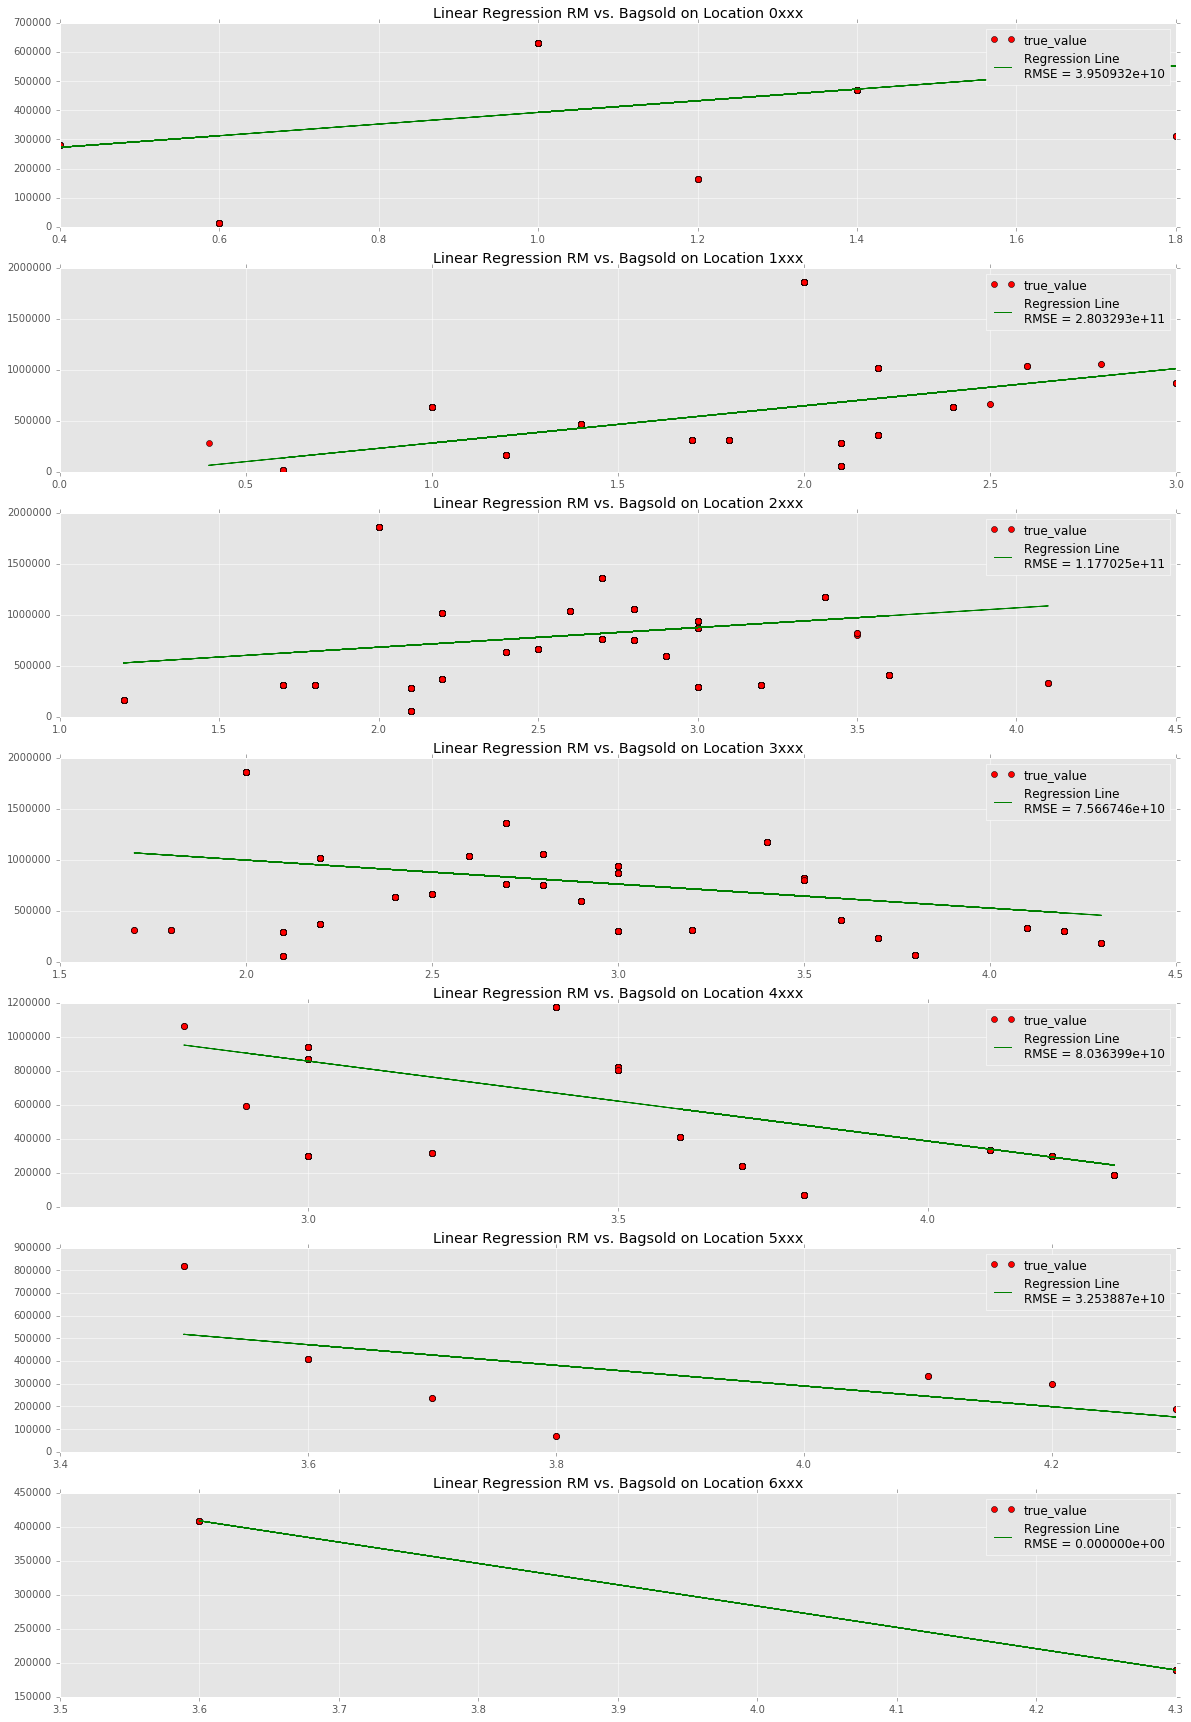

In [15]:
plt.figure(figsize=(20,30))
for i in range(len(dataByLocation)):
    data = dataByLocation[i]
    bagSold = np.asarray(data["BAGSOLD"]).reshape(-1,1).astype(np.float)
    rm = np.asarray(data["RM"]).reshape(-1,1).astype(np.float)
    
    # Liear Regression
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    
    # Find RMSE
    rmse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    detailed_output["number of data point on location {}xxx".format(i)] = len(data)
    detailed_output["RMSE on location {}xxx linear scale".format(i)] = rmse
    
    plt.subplot("{}".format(int(str(len(dataByLocation))+str(1)+str(i+1))))
    plt.title("Linear Regression RM vs. Bagsold on Location {}xxx".format(i))
    
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(rm, regr.predict(rm), color="green")
    plt.legend(["true_value", "Regression Line\nRMSE = {:e}".format(rmse)])
plt.show()

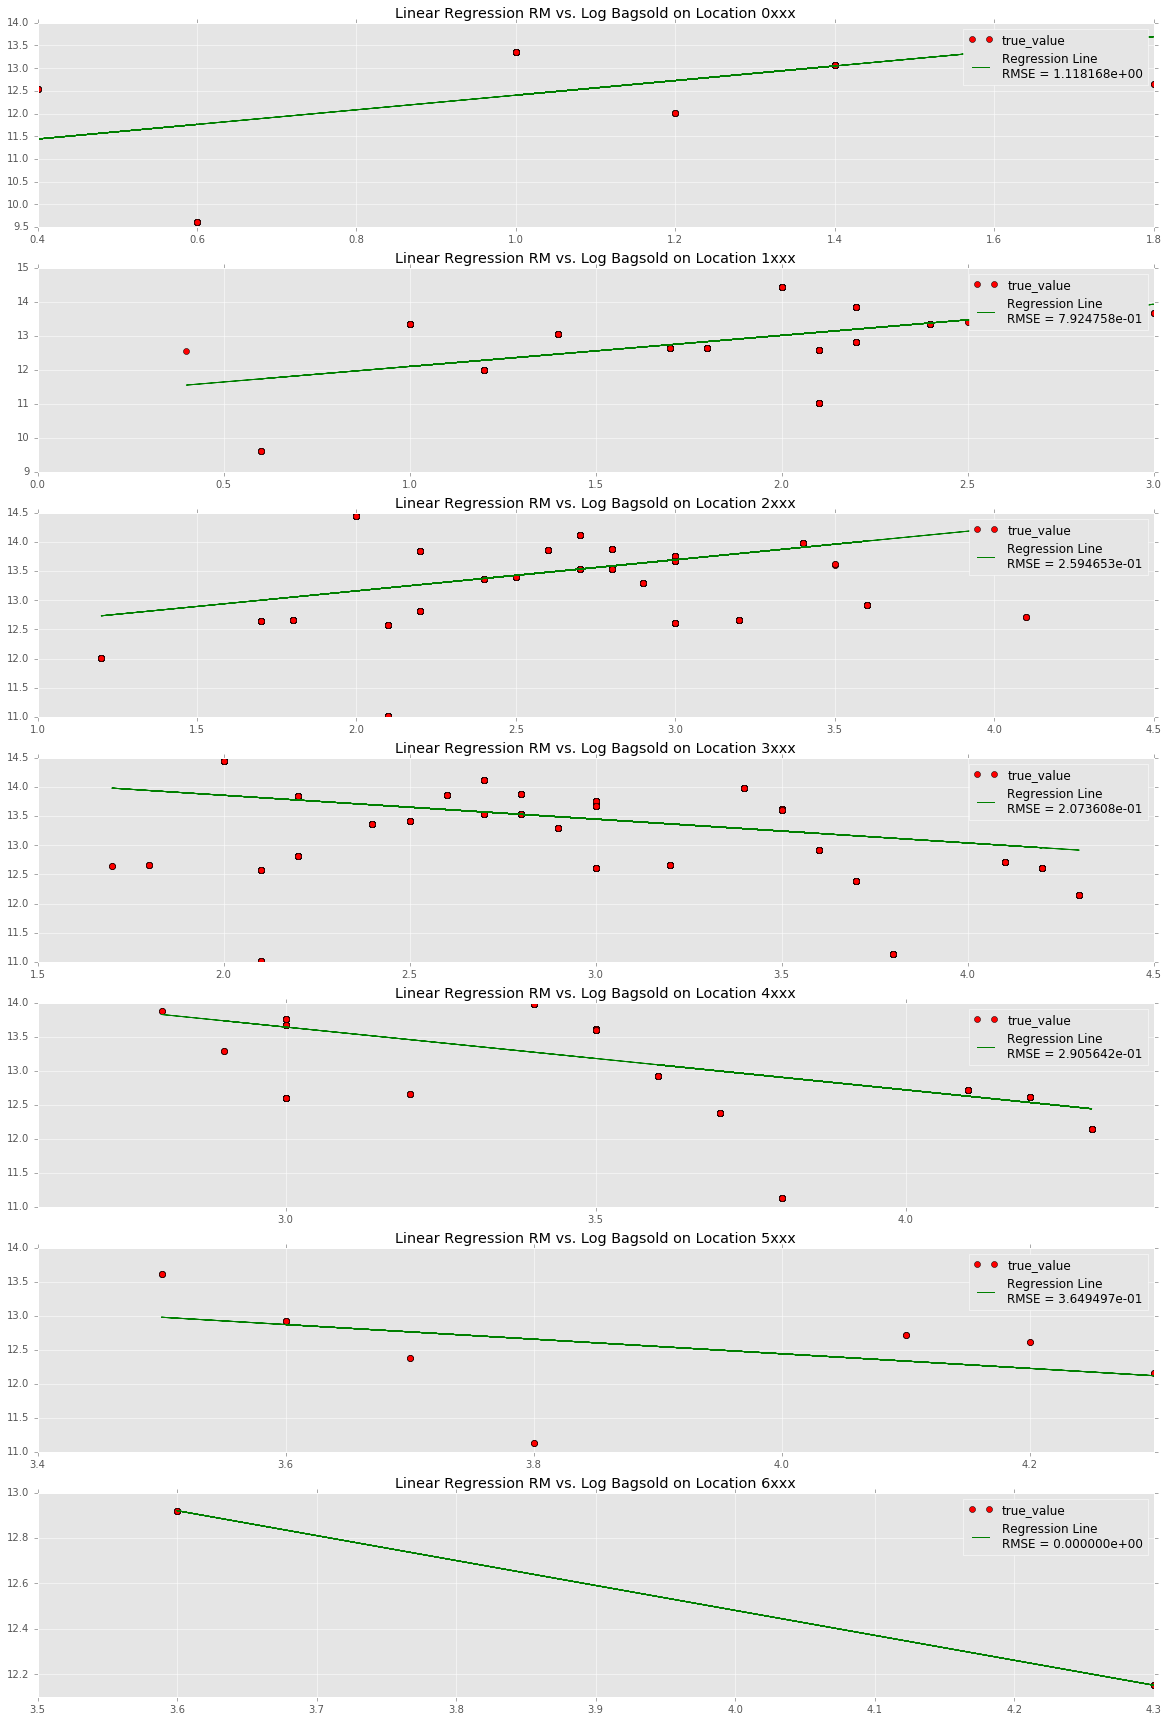

In [16]:
plt.figure(figsize=(20,30))
for i in range(len(dataByLocation)):
    data = dataByLocation[i]
    bagSold = np.log(np.asarray(data["BAGSOLD"]).reshape(-1,1).astype(np.float))
    rm = np.asarray(data["RM"]).reshape(-1,1).astype(np.float)
    
    # Liear Regression
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    
    # Find RMSE
    rmse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    detailed_output["number of data point on location {}xxx".format(i)] = len(data)
    detailed_output["RMSE on location {}xxx log scale".format(i)] = rmse
    
    plt.subplot("{}".format(int(str(len(dataByLocation))+str(1)+str(i+1))))
    plt.title("Linear Regression RM vs. Log Bagsold on Location {}xxx".format(i))
    
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(rm, regr.predict(rm), color="green")
    plt.legend(["true_value", "Regression Line\nRMSE = {:e}".format(rmse)])
plt.show()

__Analysis__
From the plots above, both Linear and Logarithmic on _Bagsold_, the followings are the results:

| Location | Number of data | RMSE (linear scale) | RMSE (log scale) |
|----------|----------------|---------------------|------------------|
| 0xxx     | 113            | 3.95e+10            | 1.12e+00         |
| 1xxx     | 667            | 2.80e+11            | 7.92e-01         |
| 2xxx     | 5337           | 1.18e+11            | 2.59e-01         |
| 3xxx     | 5061           | 7.57e+10            | 2.07e-01         |
| 4xxx     | 693            | 8.04e+10            | 2.91e-01         |
| 5xxx     | 37             | 3.25e+10            | 3.65e-01         |
| 6xxx     | 24             | 0.00e+00            | 0.00e-00         |
| ALL      | 11932          | 1.20e+11            | 3.54e-01         |

We see that in most cases the RMSE on grouped dataset is lower than the entire dataset. This suggests that there is a possiblity that we can categorize species based on location before doing further analysis using some advanced unsupervised learning techniques. 